# Object Localization and Recognition

### Necessary libraries/modules

In [153]:
import os
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt

from resnet import resnet50
from loading_data import load_train_dataset
from testing import test
from evaluation import read_test_data, evaluate1, evaluate2

from training_svm import train_SVM

from const import TEST_DIR

In [4]:
TRAIN_FLAG = False

In [5]:
# Class label (unique)
class_labels = np.asarray(['n01615121', 'n02099601', 'n02123159', 'n02129604', 'n02317335',
                           'n02391049', 'n02410509', 'n02422699', 'n02481823', 'n02504458'])
# Actual names
class_names = np.asarray(['eagle', 'dog', 'cat', 'tiger', 'star',
                          'zebra', 'bison', 'antelope', 'chimpanzee', 'elephant'])

In [6]:
# Creating ResNet50 model
model = resnet50(pretrained=True)

### Training

In [7]:
if TRAIN_FLAG is True:
    # Loading the train set (feature vectors and feature label)
    train_features = load_train_dataset(model)

In [8]:
if TRAIN_FLAG is True:
    # Feature vectors and label for Train set
    train_feature_vectors = [feature['feature_vec'] for feature in train_features]
    train_feature_labels = [feature['label'] for feature in train_features]

In [9]:
if TRAIN_FLAG is True:
    # One vs all training
    svm_models = train_SVM(train_feature_vectors, train_feature_labels, class_labels)

### Testing

In [10]:
# Loading the models before testing
svm_models = []
for i in range(10):
    svm_model = pickle.load(open('../model/svm_model_{}.obj'.format(i), 'rb'))
    svm_models.append(svm_model)

In [11]:
# Edge detection object ('Edge box' method)
edge_detection = cv2.ximgproc.createStructuredEdgeDetection('../model/model.yml')

In [12]:
# Testing results
test_predictions, box_boundaries = test(edge_detection, model, svm_models)


Testing: '0.JPEG'...
Extracting candidate windows: '0.JPEG'...
Classifying and Localizing: '0.JPEG'...
Predictions: '0.JPEG'...

Testing: '1.JPEG'...
Extracting candidate windows: '1.JPEG'...
Classifying and Localizing: '1.JPEG'...
Predictions: '1.JPEG'...

Testing: '2.JPEG'...
Extracting candidate windows: '2.JPEG'...
Classifying and Localizing: '2.JPEG'...
Predictions: '2.JPEG'...

Testing: '3.JPEG'...
Extracting candidate windows: '3.JPEG'...
Classifying and Localizing: '3.JPEG'...
Predictions: '3.JPEG'...

Testing: '4.JPEG'...
Extracting candidate windows: '4.JPEG'...
Classifying and Localizing: '4.JPEG'...
Predictions: '4.JPEG'...

Testing: '5.JPEG'...
Extracting candidate windows: '5.JPEG'...
Classifying and Localizing: '5.JPEG'...
Predictions: '5.JPEG'...

Testing: '6.JPEG'...
Extracting candidate windows: '6.JPEG'...
Classifying and Localizing: '6.JPEG'...
Predictions: '6.JPEG'...

Testing: '7.JPEG'...
Extracting candidate windows: '7.JPEG'...
Classifying and Localizing: '7.JP

Extracting candidate windows: '62.JPEG'...
Classifying and Localizing: '62.JPEG'...
Predictions: '62.JPEG'...

Testing: '63.JPEG'...
Extracting candidate windows: '63.JPEG'...
Classifying and Localizing: '63.JPEG'...
Predictions: '63.JPEG'...

Testing: '64.JPEG'...
Extracting candidate windows: '64.JPEG'...
Classifying and Localizing: '64.JPEG'...
Predictions: '64.JPEG'...

Testing: '65.JPEG'...
Extracting candidate windows: '65.JPEG'...
Classifying and Localizing: '65.JPEG'...
Predictions: '65.JPEG'...

Testing: '66.JPEG'...
Extracting candidate windows: '66.JPEG'...
Classifying and Localizing: '66.JPEG'...
Predictions: '66.JPEG'...

Testing: '67.JPEG'...
Extracting candidate windows: '67.JPEG'...
Classifying and Localizing: '67.JPEG'...
Predictions: '67.JPEG'...

Testing: '68.JPEG'...
Extracting candidate windows: '68.JPEG'...
Classifying and Localizing: '68.JPEG'...
Predictions: '68.JPEG'...

Testing: '69.JPEG'...
Extracting candidate windows: '69.JPEG'...
Classifying and Localizing

### Evaluation

In [154]:
# Evaluation 1
evaluation1_results = evaluate1(test_predictions, class_labels)

In [155]:
# Evaluation 2
evaluation2_results = evaluate2(test_predictions, box_boundaries, class_labels)

In [156]:
evaluation1_results

[{'label': 0,
  'metrics': {'accuracy': 98.0,
   'TP': 10,
   'FP': 2,
   'FN': 0,
   'TN': 88,
   'recall': 0.9999999989999999,
   'precision:': 0.8333333326388889,
   'NPV': 0.9999999998863637,
   'FPR': 0.022222222219753087,
   'FDR': 0.16666666652777776,
   'F1': 0.9090909033057851,
   'F2': 0.9615384583949703}},
 {'label': 1,
  'metrics': {'accuracy': 99.0,
   'TP': 9,
   'FP': 0,
   'FN': 1,
   'TN': 90,
   'recall': 0.8999999991,
   'precision:': 0.9999999988888888,
   'NPV': 0.9890109889023065,
   'FPR': 0.0,
   'FDR': 0.0,
   'F1': 0.9473684150692521,
   'F2': 0.9183673441274468}},
 {'label': 2,
  'metrics': {'accuracy': 99.0,
   'TP': 9,
   'FP': 0,
   'FN': 1,
   'TN': 90,
   'recall': 0.8999999991,
   'precision:': 0.9999999988888888,
   'NPV': 0.9890109889023065,
   'FPR': 0.0,
   'FDR': 0.0,
   'F1': 0.9473684150692521,
   'F2': 0.9183673441274468}},
 {'label': 3,
  'metrics': {'accuracy': 100.0,
   'TP': 10,
   'FP': 0,
   'FN': 0,
   'TN': 90,
   'recall': 0.99999999899

In [68]:
evaluation2_results["localization_accuracies"][53]

{'localization_acc': 34.40765046196356,
 'intersect_area': 31878,
 'union_area': 92648}

### Displaying on sample images

In [30]:
idx = 0

In [161]:
'''
    Drawing the overlayed image with box boundaries
    
    :param idx - index of the image in test image dataset
    :param draw_all_boxes - flag for determining the boxes for overlayed image:
                                - True: all 50 (max) boxes are drawn
                                - False: only the 'best' predicted box is drawn
    :param draw_labels - flag for determining putting the labels near the boxes
'''
def overlayed_image(idx, draw_all_boxes=False, draw_labels=False):
    # Reading image in index 'idx'
    image = cv2.imread(os.path.join(TEST_DIR, 'images', '{}.JPEG'.format(idx)))
    
    # Prediction data: label, boxes
    predicted_label, box_index = test_predictions[idx]
    
    # Ground truth data
    ground_truth_data = read_test_data(class_labels)
    ground_truth_labels = ground_truth_data['labels']
    ground_truth_boxes = ground_truth_data['boxes']
    
    # Drawing ground true box
    true_label = ground_truth_labels[idx]
    box_x1, box_y1, box_x2, box_y2 = ground_truth_boxes[idx]
    cv2.rectangle(image, (box_x1, box_y1), (box_x2, box_y2), (0, 255, 0), 2)
    
    print("Predicted label:", class_names[predicted_label])
    print("Ground truth label:", class_names[true_label])
    print("Localization accuracy:", evaluation2_results['localization_accuracies'][idx])
    
    # Ground Truth label text
    if draw_labels is True:            
        cv2.putText(image, class_names[true_label], (box_x1, box_y2 + 30), cv2.FONT_HERSHEY_TRIPLEX, 1.0, (0, 255, 0)) 
    
    # Drawing
    if draw_all_boxes is True:
        for box in box_boundaries[idx]:
            box_x1, box_y1, width, height = box
            box_x2, box_y2 = box_x1 + width, box_y1 + height
            cv2.rectangle(image, (box_x1, box_y1), (box_x2, box_y2), (255, 0, 0), 2)
    else:
        # Draw only the 'best' predicted box
        box_x1, box_y1, width, height = box_boundaries[idx][box_index]
        box_x2, box_y2 = box_x1 + width, box_y1 + height
        cv2.rectangle(image, (box_x1, box_y1), (box_x2, box_y2), (255, 0, 0), 2)
    
    # Prediction label text
    if draw_labels is True:
        cv2.putText(image, class_names[true_label], (box_x1, box_y1 - 30), cv2.FONT_HERSHEY_TRIPLEX, 1.0, (255, 0, 0)) 
        
    return image

Predicted label: chimpanzee
Ground truth label: chimpanzee
Localization accuracy: 65.61792096652404


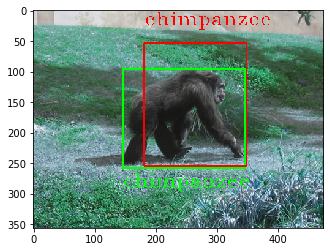

In [163]:
plt.imshow(overlayed_image(59, draw_labels=True))